<a href="https://colab.research.google.com/github/ben10ben/Complete-Python-3-Bootcamp/blob/master/EX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file = '/content/hmeq.csv'
credit = pd.read_csv(file)

In [0]:
credit.head()
#credit.describe()
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float32 
 2   MORTDUE  5442 non-null   float32 
 3   VALUE    5848 non-null   float32 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float32 
 7   DEROG    5252 non-null   float32 
 8   DELINQ   5380 non-null   float32 
 9   CLAGE    5652 non-null   float32 
 10  NINQ     5450 non-null   float32 
 11  CLNO     5738 non-null   float32 
 12  DEBTINC  4693 non-null   float32 
dtypes: bool(1), category(2), float32(10)
memory usage: 250.7 KB


Variablen:
 
1=default; 0=non-default

LOAN: amount of the loan request

MORTDUE: amount due on existing mortgage

VALUE: value of current property

REASON: DebtCon=debt consolidation; HomeImp=home improvement

JOB: occupational categories

YOJ: years at present job

DEROG: number of major derogatory reports

DELINQ: number of delinquent credit lines

CLAGE: age of oldest credit line in months

NINQ: number of recent credit inquiries

CLNO: number of credit lines

DEBTINC: debt-to-income ratio




In [0]:
# Code categories properly 
credit['REASON'] = credit['REASON'].astype('category')
credit['JOB'] = credit['JOB'].astype('category')

# The target variable has only two states so that we can store it as a boolean
credit['BAD'] = credit['BAD'].astype('bool')

# For simplicity, we can also conver LOAN to a float so that all numeric variables are of type flot
credit['LOAN'] = credit['LOAN'].astype(np.float64)

# Last, let's change all numeric variables from float64 to float 32 to reduce memory consumption
num_vars = credit.select_dtypes(include=np.float64).columns
credit[num_vars] = credit[num_vars].astype(np.float32)

# Check memory consumption after the converstions
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float32 
 2   MORTDUE  5442 non-null   float32 
 3   VALUE    5848 non-null   float32 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float32 
 7   DEROG    5252 non-null   float32 
 8   DELINQ   5380 non-null   float32 
 9   CLAGE    5652 non-null   float32 
 10  NINQ     5450 non-null   float32 
 11  CLNO     5738 non-null   float32 
 12  DEBTINC  4693 non-null   float32 
dtypes: bool(1), category(2), float32(10)
memory usage: 250.7 KB


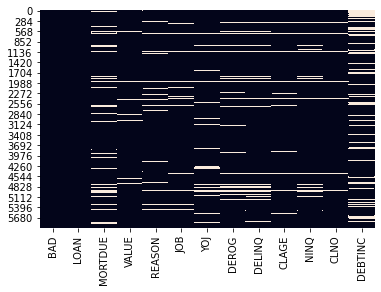

In [0]:
credit.isna().sum()
sns.heatmap(credit.isnull(), cbar=False);


In [0]:
#backup data
df = credit.copy()

In [0]:
# Variable REASON: we treat missing values as a new level.
# First we need to add a new level
#df.REASON.cat.add_categories(['IsMissing'], inplace=True)
# Now we can do the replacement
df.REASON[df.REASON.isnull() ] = "IsMissing"
df.REASON.head()

df.JOB.mode()[0]

# Variable Job: we replace missing values with the mode
df.JOB.mode()
# Alternatively
df.JOB.value_counts()

df.JOB[df.JOB.isnull() ] = df.JOB.mode()[0]
df.JOB.head()

# Verify mising value replacement was successful
if df.REASON.isnull().any() == False and df.JOB.isnull().any() == False:
    print('well done!')
else:
    print('ups')


well done!


In [0]:
for col in df.select_dtypes(include='float32').columns:
    if df[col].isna().sum() > 0:
        m = df[col].median()
        df[col].fillna(m, inplace=True)


df.isnull().sum().sum()


0